In [2]:
import numpy as np
import sympy as sp
from sympy import lambdify
import matplotlib.pyplot as plt
from math import *

w_s = sp.symbols('w_s') #peso pela area da asa


In [3]:
#inputs (AMG)

#constantes físicas
g = 32.17 #acel. gravidade em ft/s²
rhozero = 0.002378  #densidade do ar na altitude do mar [slug]
rhozero_lb = 0.002378 * 32.174 #densidade do ar na altitude do mar [lb]
rho =  0.001263 #para uma altitude de 20000 ft
rho_lb =  0.001263*32.174 #para uma altitude de 20000 ft [lb]
rho_c = 0.001054 #densidade do ar a 25000 ft #teto maximo
sigma_c = rho_c/rhozero
sigma = rho/rhozero

#dados da tripulação e passageiros
Wpayload = 95*220 
Wcrew = 4*220

#perfomance
C = 0.44/(3600) #razão de combustível em 1/s
R = 6080*(1080-200)  #alcance em ft
n = 0.9 #eficiencia
npp_decol = 0.7 #eficiencia na decolagem
npp_max = 0.85

#coeficientes aerodinâmicos
C_d = 0.018 #coef. de arrasto
C_d_zero_lg = 0.006 #*entre 0.006 e 0.012
C_d_zero_hld_to = 0.003 #*entre 0.003 e 0.008
C_L_C = 0.3 #é o coeficiente de sustentação em cruzeiro (em torno de 0,3 para aeronave susbsônicas e 0,05 para supersônicas)
C_L_flapto = 0.8 #*é o coeficiente de sustentação adicional gerado pelos flaps (entre 0,3 e 0,8)
cl_max = 2.7 # chutado

#dados da pista
sto = 4300 #ft
mi = 0.05 #coeficiente de fricção. entre 0.03 e 0.05. 0.05 pra pista molhada

#velocidades de operação
V = 250*1.688 #vel. cruz. em ft/s
vs = 80*1.688 #vel. estol. chutado em ft/s
V_max = 1.25*(V) #vel. max 1.25 da vel. cruz.
vto = 1.3*vs #entre 1.1 e 1.3 da vs
VR = 1.1*vs #* vel. rot. entre 1.1 e 1.2 da velocidade de estol 
ROC = 20 #rate of climb ft/s ao nivel do mar 
ROCc = 5 #rate of climb ft/s no teto de serviço

#outros dados
AR = 12 #aspect ratio
k = 1/(pi*AR*0.9) #k é o k
a = -8.2*(10**(-7))
b = 0.65 

x_vals = np.linspace(0, 100, 1000) #intervalo para w_s

In [4]:
#estimativa de peso
L_D = 1/(2*sqrt(C_d*k)) #razão sustentação e arrasto
np_w0 = (1-0.98*0.97*0.99*0.997*exp(-R*C/(0.866*(V)*L_D)))*1.05

def peso_aeronave(i):
    return (Wpayload + Wcrew)/(1-np_w0-(i*a + b))

def interactive_Function(x):
    y = peso_aeronave(x)
    if(int(x) != int(y)):
        return interactive_Function(y)
    else:
        return y

In [5]:
#outputs
print(f"Peso da payload [lb]: {Wpayload}")
print(f"Peso da tripulação [lb]: {Wcrew}")
wltow = interactive_Function(80000)
print(f"WLTOW [lb]: {int(wltow)}")
we = (1.59*(wltow**(-1*0.0906)))*wltow
print(f"Peso vazio da aeronave [lb]: {int(we)}")
print(f"Velocidade de cruzeiro [knots]: {V/1.688}")
print(f"Eficiência da hélice: {n}")
print(f"Alcance [nmi]: {(R/6080)+200}")
print(f"Aspect Ratio: {AR}")
print(f"Coeficiente de arrasto C_d: {C_d}")
print(f"Razão de combustível: {round(C*3600,2)}")
print(f"Razão peso vazio e peso máximo de decolagem: {round(we/wltow,2)}")
print(f"Razão de combustível e peso máximo de decolagem: {round(np_w0,2)}")
print(f"Razão sustentação e arrasto: {round(L_D,1)}")

Peso da payload [lb]: 20900
Peso da tripulação [lb]: 880
WLTOW [lb]: 79862
Peso vazio da aeronave [lb]: 45665
Velocidade de cruzeiro [knots]: 250.0
Eficiência da hélice: 0.9
Alcance [nmi]: 1080.0
Aspect Ratio: 12
Coeficiente de arrasto C_d: 0.018
Razão de combustível: 0.44
Razão peso vazio e peso máximo de decolagem: 0.57
Razão de combustível e peso máximo de decolagem: 0.14
Razão sustentação e arrasto: 21.7


<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in divide
  return 467.5/(0.166586211920521*w_s + (3141.38923846875 - 0.166586211920521*w_s**2)/w_s)
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in divide
  return -1.87978490703609*(1 - exp((0.803238297571853 - 0.0001000607891187*w_s**2)/w_s))*exp(-(0.803238297571853 - 0.0001000607891187*w_s**2)/w_s)/(0.00343393362008532 - 4.27771072228082e-7*w_s**2)
<lambdifygenerated-2>:2: RuntimeWarning: invalid value encountered in multiply
  return -1.87978490703609*(1 - exp((0.803238297571853 - 0.0001000607891187*w_s**2)/w_s))*exp(-(0.803238297571853 - 0.0001000607891187*w_s**2)/w_s)/(0.00343393362008532 - 4.27771072228082e-7*w_s**2)
<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return 467.5/(0.166586211920521*w_s + (3141.38923846875 - 0.166586211920521*w_s**2)/w_s)
<lambdifygenerated-2>:2: RuntimeWarning: divide by zero encountered in scalar divide
  return -1.879

'S = 1619.2 ft² e P = 10880.0 hp'

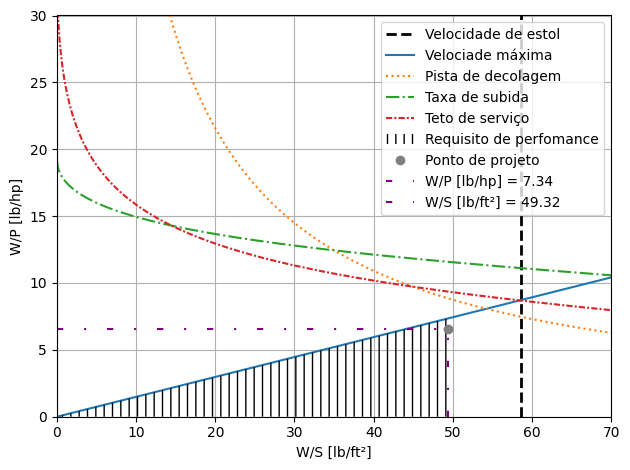

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

#Definição da área da asa e dimensionamento do motor.

#Velocidade de estol
vsws = ((1/2)*rhozero*(vs**2)*cl_max)
ax.vlines(x=vsws,ymin=0,ymax=100,colors='black',linestyle='dashed',label=f'Velocidade de estol',linewidth=2) #plotando velocidade de estol

#Velocidade máxima
CL =  2*w_s/(rho*(V_max**2)) #coeficiente de sustentação em função da área da asa na velocidade máxima
C_d_zero = C_d - k*(CL**2)
W_P_vmax = (550)*(npp_max/((1/2)*rhozero*(V_max**3)*C_d_zero*(1/(w_s)) + (w_s*2*k/(rho*sigma*V_max))))
w_p_vmax = lambdify(w_s, W_P_vmax, modules=['numpy'])
y_vals_vmax = w_p_vmax(x_vals)
ax.plot(x_vals, y_vals_vmax,label='Velociade máxima') #plotando velocidade maxima

#Pista de decolagem #coeficiente de sustentação durante a rotação
C_L_to = C_L_C + C_L_flapto #coeficiente de sustentação na decolagem
C_d_zero_to = C_d_zero + C_d_zero_lg + C_d_zero_hld_to #coeficiente de arrasto para zero sustentação
C_d_to = C_d_zero_to + k*(C_L_to**2) #coeficiente de arrasto na configuração de decolagem
C_d_g = C_d_to - mi*C_L_to
C_L_R = cl_max/(1.1**2)

expvalue = sp.exp(0.6*rho*g*C_d_g*sto*(1/w_s))
W_P_sto = (1-expvalue)/(mi-(mi+(C_d_g/C_L_R)*(expvalue)))*(0.6/vto)*550
w_p_sto = lambdify(w_s,W_P_sto,modules=['numpy'])
y_vals_sto = w_p_sto(x_vals)
ax.plot(x_vals,y_vals_sto,label='Pista de decolagem',linestyle='dotted') #plotando pista de decolagem

#taxa de subida
root = sp.sqrt((2*w_s)/(rho*sp.sqrt(3*C_d_zero/k)))
W_P_roc = 550/(ROC/npp_decol + root*(1.155/(L_D*npp_decol)))
w_p_roc = lambdify(w_s,W_P_roc,modules=['numpy'])
y_vals_roc = w_p_roc(x_vals)
ax.plot(x_vals,y_vals_roc,label='Taxa de subida',linestyle='dashdot') #plotando taxa de subida

#teto de serviço
rootc = sp.sqrt((2*w_s)/(rho_c*sp.sqrt(3*C_d_zero/k)))
W_P_rocc = 550*sigma_c/(ROCc/npp_decol + root*(1.155/(L_D*npp_decol)))
w_p_rocc = lambdify(w_s,W_P_rocc,modules=['numpy'])
y_vals_rocc = w_p_rocc(x_vals)
ax.plot(x_vals,y_vals_rocc,label='Teto de serviço',linestyle=(0, (3, 1, 1, 1))) #plotando teto de serviço

#determinando o ponto de projeto
x_vals_d = np.linspace(0,vsws,1000)

funcoes = [w_p_vmax,w_p_roc,w_p_rocc,w_p_sto]
pontos_max = [w_p_vmax(vsws),w_p_roc(vsws),w_p_rocc(vsws),w_p_sto(vsws)]

index = pontos_max.index(min(pontos_max))
funcao_min = funcoes[index]
opontox = vsws

for i in x_vals_d:
    if round(w_p_vmax(i),1) == round(funcao_min(i),1):
        opontox = (i-5)
        opontoy =  (w_p_vmax(i)-1.5)

x_vals_d = np.linspace(0,opontox,1000)
for mask in [w_p_vmax(x_vals_d) > 0]:
    ax.fill_between(x_vals_d[mask], w_p_vmax(x_vals_d[mask]), y2=0, hatch='||', zorder=2,
                    color="none", edgecolor='black', linewidth=0.0,label='Requisito de perfomance')

ax.plot(opontox,opontoy,'o',color='grey',label='Ponto de projeto')
ax.hlines(xmin=0,xmax=opontox,y=opontoy,linestyle=(0, (3, 10, 1, 10)),color='purple',label=f'W/P [lb/hp] = {round(w_p_vmax(opontox),2)}')
ax.vlines(ymin=0,ymax=opontoy,x=opontox,linestyle=(0, (3, 10, 1, 10)),color='purple',label=f'W/S [lb/ft²] = {round(opontox,2)}')
ax.set_ylabel("W/P [lb/hp]")
ax.set_xlabel("W/S [lb/ft²]")
ax.set_ylim([0,30])
ax.set_xlim([0,70])
ax.grid()
ax.legend()
plt.tight_layout()

S = wltow/opontox
P = wltow/w_p_vmax(opontox)
display(f'S = {round(S,1)} ft² e P = {round(P,1)} hp')

In [7]:
#PROJETO DA ASA
#ASA ALTA PELO MERCADO (ATR 72600)
Wi = wltow*g #PESO INICIAL DA AERONAVE (CONSIDERAMOS CARGA MÁXIMA)
Wf = (wltow - (wltow*(round(np_w0,2))))*g
W_AVE = (1/2)*(Wi+Wf) # PESO MÉDIO DURANTE CRUZEIRO
C_LC = (2*W_AVE)/(rho_lb*S*V**2) # COEFICIENTE DE SUSTENTAÇÃO EM CRUZEIRO
display(C_LC)
C_TO = 0.85*((2*Wi)/(rhozero_lb*S*vto**2)) #COEFICIENTE DE SUSTENTAÇÃO REQUERIDO PARA TAKE OFF(DECOLAGEM)
#PARA OS DISPOSITIVOS HIPERSUSTENTADORES POR TABELA DEFINE-SE O PLAIN FLAP
ENV = (S*AR)**(1/2) #ENVERGADURA (CHUTE INICIAL) | FOI FEITA UMA MEDIA ENTRE A ASA DO ATR 72600 E B 737-700 PARA TENDO EM VISTA UMA MAIOR AREA OBTIDA PARA NAO ADICIONAR TUDO EM CORDA DA ASA
CHORD = S/ENV #CORDA ADA ASA (CHUTE INICIAL) | COM INTUITO DE COMPARACAO A CHORDA DO ATR 72600 E 7.55 FT | FOI EVITADO AUMENTAR MUITO A CORDA PARA NAO AUMENTAR TANTO O ARRASTO.
Bf = 0.7*(ENV/2) #ENVERGADURA DO FLAP, 0,69 É UM VALOR RETIRADO COM BASE EM AERONAVES PARECIDAS (FOKKER 27)
Cf = 0.25*CHORD #CORDA DO FLAP, O.313 E UM VALOR RETIRADO COM BASE EM AERONAVES PARECIDAS (FOKKER 27)
DEFLEX_DECOL = 20 #CHUTE INICIAL DE DEFLEXAO DE FLAP PARA DECOLAGEM (GRAUS)
DEFLEX_POUS = 50 #CHUTE INICIAL DE DEFLEXAO DE FLAP PARA POUSO (GRAUS)
DELTA_CL_HLD = 0.9 #VARIACAO NO CL MAX DEVIDO AO DISPOSITIVO HIPER SUSTENTADOR
#ESCOLHA DO AEROFOLIO
C_LC_W = C_LC/0.95 #COEFICIENTE DE SUSTENTACAO DE CRUZEIRO DA ASA
C_l_i = C_LC_W/0.9 #COEFICIENTE DE SUSTENTACAO IDEAL DO AEROFOLIO
C_L_MAXW = (2*Wi)/(rhozero_lb*S*vs**2) #COEFICIENTE DE SUSTENTACAO MAXIMO
C_L_MAXW_W = C_L_MAXW/0.95 #COEFICIENTE DE SUSTENTACAO MAXIMO DA ASA
C_L_MAX_AERO = C_L_MAXW_W/0.9 #COEFICIENTE DE SUSTENTACAO MAXIMO DO AEROFOLIO (CONSIDERADO OS DISPOSITIVOS HIPER SUSTENTADORES)
C_l_MAX = C_L_MAX_AERO - DELTA_CL_HLD #COEFICIENTE DE SUSTENTACAO MAXIMO DO AEROFOLIO (SEM CONSIDERAR OS DISPOSITIVOS HIPER SUSTENTADORES)
# ASSIM O AEROFOLIO DETERMINADO É NACA 63-412 http://airfoiltools.com/airfoil/details?airfoil=n63412-il
Cl0 = 0.3401 # VALOR DE CL QUANDO O ANGULO DE ATAQUE É 0 RETIRADO DO SITE ACIMA
Cla = 0.1074 # INCLINACAO DA RETA CL ALPHA EM [1/DEG] RETIRADO DO SITE ACIMA PARA UM REYNOLDS DE 10^6 | 6.151 em [1/RAD]
iw = (C_l_i-Cl0)/Cla # INCIDENCIA DA ASA DA AERONAVE EM [DEG] DEFINIDO PELO CL IDEAL SEGUNDO SAEDREY
#ENFLECHAMENTO E DIEDRO É DEFINIDO POR AERONAVES MODELO (NÃO ACHEI O CERTINHO DO ATR72600 ENTAO VOU USAR AS TABELAS DO SAEDRAY)
DIHEDRAL = 4.7 #DIEDRO DA AERONAVE [DEG] - FAIRCHILD SA227
SWEEP_ANG = 3.1 #ENCFLECHAMENTO DA AERONAVE [DEG] - ATR 42
gamma = np.deg2rad(SWEEP_ANG)
OSWALD = 4.61*(1-0.045*AR**0.68)*(np.cos(gamma)**0.15)-3.1 #FATOR DE OSWALD
#ALOGAMENTO | AFILAMENTO | TORCAOO DA ASA
AR_NOVO = (ENV**2)/S #ALONGAMENTO
AFILAMENTO = 0.365 # VALOR RETIRADO DE TABELA DO SAEDRAY JET STREAM 41
TWIST = -3 # VALOR RETIRADO DE TABELA DO SAEDRAY (MAIORIA)
#ARRASTO E MOMENTO TORSOR PARA CRUZEIRO
CD_ASA = 0.00565 #COEFICIENTE DE ARRASTO ANGULO DE ATAQUE 0
CM_ASA = -0.0792 #COEFICIENTE DE MOMENTO ANGULO DE ATAQUE 0
D = (CD_ASA*S*rho_lb*V**2)/2 #ARRASTO EM CRUZERIO 
M = (1/2)*rho_lb*S*CHORD*CM_ASA*V**2 #MOMENTO DE ARFAGEM 


0.40783195913485765

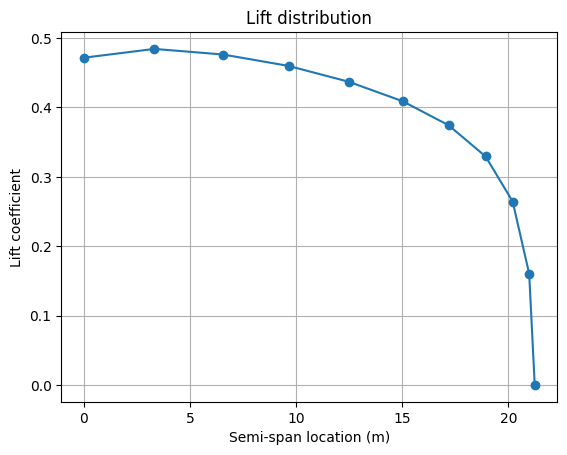

CL_wing: 0.4115746606064149


In [9]:
#LLT
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros
N = 10  # (number of segments - 1)
S = 150.42  # m^2
AR = 12  # Aspect ratio
lambda_ = 0.365  # Taper ratio
alpha_twist = -3  # Twist angle (deg)
i_w = 3  # wing setting angle (deg) AUMENTEI PARA 3 PARA DAR O CL CRUZERIO BATER
a_2d = 6.151  # lift curve slope (1/rad)
alpha_0 = -2.75  # zero-lift angle of attack (deg)

# Cálculos
b = np.sqrt(AR * S)  # wing span (m)
MAC = S / b  # Mean Aerodynamic Chord (m)
Croot = (1.5 * (1 + lambda_) * MAC) / (1 + lambda_ + lambda_**2)  # root chord (m)

theta = np.linspace(np.pi / (2 * N), np.pi / 2, N)
alpha = np.linspace(i_w + alpha_twist, i_w, N)

z = (b / 2) * np.cos(theta)
c = Croot * (1 - (1 - lambda_) * np.cos(theta))  # Mean Aerodynamics Chord at each segment (m)
mu = c * a_2d / (4 * b)

LHS = mu * (alpha - alpha_0) / 57.3  # Left Hand Side

# Solving N equations to find coefficients A(i):
B = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        B[i, j] = np.sin((2 * j + 1) * theta[i]) * (1 + (mu[i] * (2 * j + 1)) / np.sin(theta[i]))

A = np.linalg.solve(B, LHS)

sum1 = np.zeros(N)
sum2 = np.zeros(N)
for i in range(N):
    for j in range(N):
        sum1[i] += (2 * j + 1) * A[j] * np.sin((2 * j + 1) * theta[i])
        sum2[i] += A[j] * np.sin((2 * j + 1) * theta[i])

CL = 4 * b * sum2 / c
CL1 = np.concatenate(([0], CL))
y_s = np.concatenate(([b / 2], z))

# Plotting
plt.plot(y_s, CL1, '-o')
plt.grid()
plt.title('Lift distribution')
plt.xlabel('Semi-span location (m)')
plt.ylabel('Lift coefficient')
plt.show()

CL_wing = np.pi * AR * A[0]
print("CL_wing:", CL_wing)


In [65]:
#LLT FLAP 
import numpy as np
import matplotlib.pyplot as plt

# Definição dos parâmetros
N = 10  # (number of segments - 1)
S = 150.42  # m^2
AR = 12  # Aspect ratio
lambda_ = 0.365  # Taper ratio
alpha_twist = -3  # Twist angle (deg)
i_w = 3  # wing setting angle (deg)
a_2d = 6.151  # lift curve slope (1/rad)
a_0 = -3  # flap up zero-lift angle of attack (deg)
a_0_fd = -13.5  # flap down zero-lift angle of attack (deg)

# Cálculos
b = np.sqrt(AR * S)  # wing span (m)
bf_b = 0.7  # flap-to-wing span ratio
MAC = S / b  # Mean Aerodynamic Chord (m)
Croot = (1.5 * (1 + lambda_) * MAC) / (1 + lambda_ + lambda_**2)  # root chord (m)

theta = np.linspace(np.pi / (2 * N), np.pi / 2, N)
alpha = np.linspace(i_w + alpha_twist, i_w, N)

alpha_0 = np.array([a_0_fd if (i / N) > (1 - bf_b) else a_0 for i in range(1, N + 1)])

z = (b / 2) * np.cos(theta)
c = Croot * (1 - (1 - lambda_) * np.cos(theta))  # Mean Aerodynamics Chord at each segment (m)
mu = c * a_2d / (4 * b)

LHS = mu * (alpha - alpha_0) / 57.3  # Left Hand Side

# Solving N equations to find coefficients A(i):
B = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        B[i, j] = np.sin((2 * j + 1) * theta[i]) * (1 + (mu[i] * (2 * j + 1)) / np.sin(theta[i]))

A = np.linalg.solve(B, LHS)

sum1 = np.zeros(N)
sum2 = np.zeros(N)
for i in range(N):
    for j in range(N):
        sum1[i] += (2 * j + 1) * A[j] * np.sin((2 * j + 1) * theta[i])
        sum2[i] += A[j] * np.sin((2 * j + 1) * theta[i])

CL_TO = np.pi * AR * A[0]

print("CL_TO:", CL_TO)


CL_TO: 1.2716060795267436


In [11]:
#PROJETO FUSELAGE ((SELOCO))
#dados da cabine
S_w = 1.443     #Seat width (ft)
S_p = 2.46        #Seat pitch (ft)
HR = 4.1    #Headroom (120-130)
A_w = 1.499344    #Aisle width (ft)
alpha_seat = 10 #angulo do assento (em graus) (10-13)
D_f = 13.4514 + 1.443 #diametro do atr mais largura do assento adicional no AMG
L_f = 160.15   #total lenght fuselage
L_nariz = D_f*1.5    #autoexplicativo   
L_cauda = 2*D_f      #autoexplicativo   
L_c = L_f - (L_nariz + L_cauda) #length cabine
c1 = 2.49 #cte 1
c2 = 1.24 #cte 2
c3 = 1.08 #cte 3
N_r = 17 #numero de fileiras
N_a = 5 #numero de assentos por fileira
epsilon = 0.052 #epsilon é o epsilon 
P = 2.7
h = 6


V_press = (np.pi/4)*(c1 +c2*S_w*N_a)**2*(c3)*(P*N_r)**(1 + epsilon)
print('V press = ', V_press)
V_free = (np.pi/4)*(c1 +c2*S_w*N_a)**2*(c3)*(P*N_r)**(1 + epsilon)*h
print ('V_free = ', V_free)

print('Valores comprimento Nariz, cabine e cauda:', L_nariz, L_c, L_cauda)
print('Lf/Df = ', L_f/D_f)

V press =  6213.473429486949
V_free =  37280.84057692169
Valores comprimento Nariz, cabine e cauda: 22.3416 108.01960000000001 29.7888
Lf/Df =  10.752363304329144


In [26]:
#PROJETO EMPENAGEM
#Usando como base Twin turboprop e Alenia G222

V_H = 0.85 #Horizontal tail volume coefficient (V_H)
V_V = 0.08 #Vertical tail volume coefficient (V_H) (utilizando como base twinturboprop)
C_barra = (2/3)*Croot*3.2*((1 + lambda_ + lambda_**2)/(1 + lambda_)) #C barra dã (3.2 por conta do m to ft)
display(C_barra)
K_C = 1.3 #variar de 1 a 1.4
Nh = 0.85 # eficiencia aerodinamica da empenagem horizontal (0.85 - 0.95)
Clh = sp.symbols('Clh')
hho = 0.3 #distancia entre cg e ca (ft)
lv = 19 #distancia entre o centro aerodinamico da aeronave e o da empenagem vertical
bv = 24 #retirado do atr 72-500
lambdah = 0.56
Cvtip = sp.symbols('Cvtip')
lambdav = 0.50
bh = 35
Cv = sp.symbols('Cv')
Chtip = sp.symbols('Chtip')


#Sh = S*0.20
#Braço de alavanca da empenagem
l_opt = K_C*sqrt(4*C_barra*S*10.7639*(V_H/(pi*D_f))) #o valor de 10.7639 se deve a correção das unidades de medida (m^2 para ft^2)
print('l_opt = ', l_opt)
#Área da empenagem horizontal (Sh)
Sh = 10.7639*V_H*C_barra*S/(l_opt)
print('Sh:' , Sh)
#Cálculo do coeficiente de momento da asa/fuselagem

C_mowf = CM_ASA*(AR*np.cos(SWEEP_ANG)**2/(AR + 2*np.cos(SWEEP_ANG))) + 0.01*(alpha_twist)
print('C_mowf: ', C_mowf)

#Definição do h - ho em termos de MAC

 ###definir aerofolio
#Cálculo do coeficiente de sustentação necessário da empenagem em cruzeiro para compensação (Clh)
Clh = (C_mowf + CL*(-hho))/(Nh*V_H) #escolher o ultimo valor
print('Clh = ' , Clh)

#Alongamento

ARh = AR*(2/3)
print('Alongamento empenagem horizontal :', ARh)
#AfilamentO 
Afi = 0.4 #entre 0.4 e 0.7
print('afilamento: ', Afi )

#Enflechamento 
# SWEEP_ANG (mesmo da asa ou um pouco maior)
print('enflechamento: ', SWEEP_ANG)
#parâmetros geométricos
MAChh = Sh/bh
crootvh = (1.5*(1+lambdah)*MAChh)/(1+lambdah+lambdah**2) #OS CROODS! corda da raiz empenagem horizontal
Ch_ = (2/3)*crootvh*((1 + lambdah + lambdah**2)/(1 + lambdah)) #sla
Sh = bh*Ch_ #area eh
ARh = bh/Ch_ #aspect ratio pra empenage horizontal
Chtip = lambdah*crootvh #corda da coisa que não é a raiz
print('Ch_ = ', Ch_)
print('Chtip = ', Chtip)
print('crootvh = ', crootvh)
print('ARH', ARh)
#AEROFOLIO: 64-00
#Empenagem vertical
#mesmo braço utilizado para a horizontal (l_opt)

#Área da empenagem vertical

Sv = (b*S*10.7639*V_V)/lv #area empenage verticar
print('Sv = ', Sv)

#Parâmetros geométricos
MACvv = Sv/bv
Cvroot = (1.5*(1+lambdav)*MACvv)/(1+lambdav+lambdav**2) #corda da raiz da empenagem verticar
Cv_ = (2/3)*Cvroot*((1 + lambdav + lambdav**2)/(1 + lambdav)) #nao faço ideia pra que isso serve
ARv = (bv**2)/Sv #aspect ratio empenagem verticar
lambdav = Cvtip/Cvroot #lambida :P empenagem vertical
print('lambdav = ', lambdav)
print('Cvtip = ', Cvtip )
print ('Cvroot = ', Cvroot) 
Sv = bv*Cv_
ARV = bv/Cv_
display(ARV)
#NACA 0006

11.329536618944308

l_opt =  47.46134714550186
Sh: 328.5233561013686
C_mowf:  -0.1248592726473381
Clh =  [-0.23934516 -0.28261044 -0.30959683 -0.32826272 -0.34264763 -0.35428994
 -0.36379895 -0.37061259 -0.37396605 -0.36870665]
Alongamento empenagem horizontal : 8.0
afilamento:  0.4
enflechamento:  3.1
Ch_ =  9.386381602896245
Chtip =  6.5648561338787585
crootvh =  11.722957381926353
ARH 3.7288064219763304
Sv =  289.6376665510659
lambdav =  0.0644483395027475*Cvtip
Cvtip =  Cvtip
Cvroot =  15.516303565235672


1.988691618941923